In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

In [51]:
# from ercollect import molecule as mol
# from ercollect.molecule import molecule
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
import matplotlib.pyplot as plt
import numpy as np
import sys
# import random
# import os
# import requests
# from rdkit.Chem import Draw
# from rdkit.Chem import AllChem as Chem
# from rdkit.Chem.Draw import IPythonConsole
# from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
# from IPython.display import clear_output
# from ercollect import SABIO_IO

Author: Andrew Tarzia

Date Created: 11 Dec 2018

Distributed under the terms of the MIT License.

# Notebook to analyse reaction systems for the SALE-ZIF-8 case study

## Step 1:
- Find reaction systems with maximum component sizes within some range
    - lower threshold $\leq d \leq$ upper threshold

In [4]:
threshold = (5, 7)

In [5]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [14]:
target_RS = []
out_range = []
in_range = []
for i, rs in enumerate(yield_rxn_syst(output_dir=directory)):
    if rs.skip_rxn is True:
        continue
    if rs.max_comp_size is None:
        continue
    if rs.max_comp_size > threshold[0] and rs.max_comp_size <= threshold[1]:
        target_RS.append(rs.pkl)
        in_range.append(rs.max_comp_size)
    else:
        out_range.append(rs.max_comp_size)    

1134 reactions in threshold


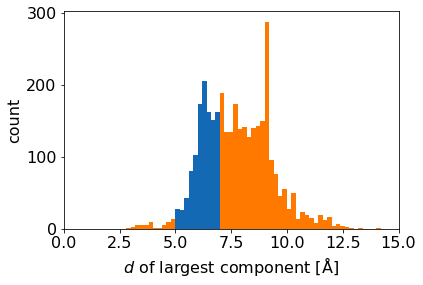

In [30]:
print(len(target_RS), 'reactions in threshold')target_RS = []
fig, ax = plt.subplots()
ax.hist(in_range, facecolor='#1469b5', histtype='stepfilled', bins=np.arange(0, 20, 0.2))
ax.hist(out_range, facecolor='#FF7900', histtype='stepfilled', bins=np.arange(0, 20, 0.2))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('$d$ of largest component [$\mathrm{\AA}$]', fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_xlim(0, 15)
plt.show()

## Step 2:
- From the target RS:
    - Plot the value added as the change in synthetic accessibility
    - Select out reactions with a change in synthetic accessibility $>$ SA threshold

In [36]:
SA_threshold = 1.5

In [40]:
target_RS_2 = []
top_delta_SA = []
other_delta_SA = []
for pkl in target_RS:
    rs = get_RS(directory+pkl, output_dir=directory, verbose=False)
    if rs.delta_sa > SA_threshold:
        top_delta_SA.append(rs.delta_sa)
        target_RS_2.append(rs.pkl)
    else:
        other_delta_SA.append(rs.delta_sa)

55 reactions in threshold


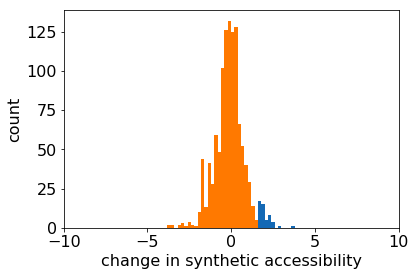

In [41]:
print(len(target_RS_2), 'reactions in threshold')
fig, ax = plt.subplots()    
ax.hist(top_delta_SA, facecolor='#1469b5', histtype='stepfilled', bins=np.arange(-10, 10, 0.2))
ax.hist(other_delta_SA, facecolor='#FF7900', histtype='stepfilled', bins=np.arange(-10, 10, 0.2))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('change in synthetic accessibility', fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_xlim(-10, 10)
plt.show()

## Step 3:
- Select reactions with only one reactant

In [52]:
target_RS_3 = []
no_react_1 = []
no_react_above = []
for pkl in target_RS_2:
    rs = get_RS(directory+pkl, output_dir=directory, verbose=False)
    no_r = 0
    for m in rs.components:
        if m.role == 'reactant':
            no_r += 1
    if no_r > 1:
        no_react_above.append(no_r)
    elif no_r == 1:
        no_react_1.append(no_r)
        target_RS_3.append(rs.pkl)
    else:
        print('THERE IS A PROBLEM HERE!')
        print(rs.pkl)
        print(rs.DB_ID, rs.DB)
        sys.exit()


11 reactions in threshold


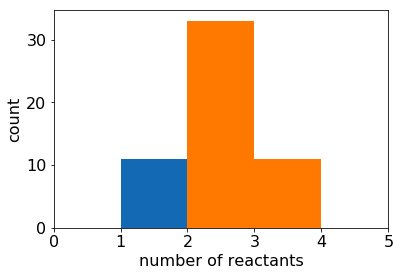

In [53]:
print(len(target_RS_3), 'reactions in threshold')
fig, ax = plt.subplots()    
ax.hist(no_react_1, facecolor='#1469b5', histtype='stepfilled', bins=np.arange(0, 10, 1))
ax.hist(no_react_above, facecolor='#FF7900', histtype='stepfilled', bins=np.arange(0, 10, 1))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('number of reactants', fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.set_xlim(0, 5)
plt.show()

## Step 3:
- Print each reaction

In [57]:
for pkl in target_RS_3:
    rs = get_RS(directory+pkl, output_dir=directory, verbose=False)
    print('---------------')
    print(rs.pkl)
    print('EC:', rs.EC, ' --- KEGG ID:', rs.DB_ID)
    before_str = []
    after_str = []
    for m in rs.components:
        if m.role == 'reactant':
            before_str.append(m.name)
        elif m.role == 'product':
            after_str.append(m.name)
    print(' + '.join(before_str), '->', ' + '.join(after_str))
    print('---------------')

---------------
sRS-4_1_1_78-KEGG-R04177.gpkl
EC: 4.1.1.78  --- KEGG ID: R04177
enol-oxaloacetic acid -> acetylenedicarboxylate(2-) + water
---------------
---------------
sRS-4_2_1_172-KEGG-R11819.gpkl
EC: 4.2.1.172  --- KEGG ID: R11819
trans-4-hydroxy-L-proline -> (S)-1-pyrroline-5-carboxylate + water
---------------
---------------
sRS-4_2_1_69-KEGG-R00778.gpkl
EC: 4.2.1.69  --- KEGG ID: R00778
urea -> cyanamide + water
---------------
---------------
sRS-4_2_3_27-KEGG-R08199.gpkl
EC: 4.2.3.27  --- KEGG ID: R08199
prenyl diphosphate -> isoprene + Diphosphate
---------------
---------------
sRS-4_2_3_3-KEGG-R01016.gpkl
EC: 4.2.3.3  --- KEGG ID: R01016
Glycerone phosphate -> Methylglyoxal + Phosphate
---------------
---------------
sRS-4_3_1_1-KEGG-R00490.gpkl
EC: 4.3.1.1  --- KEGG ID: R00490
L-Aspartate -> Fumarate + ammonia
---------------
---------------
sRS-5_2_1_1-KEGG-R01087.gpkl
EC: 5.2.1.1  --- KEGG ID: R01087
Maleate -> Fumarate
---------------
---------------
sRS-XX_XX_XX_XX

## Step 3:
- Plot the maximum logP vs. maximum logS of the remaining reactions

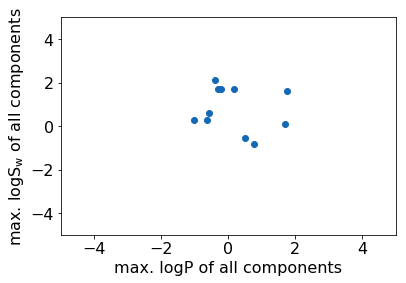

In [56]:
fig, ax = plt.subplots()
for pkl in target_RS_3:
    rs = get_RS(directory+pkl, output_dir=directory, verbose=False)
    ax.scatter(rs.max_logP, rs.max_logS, c='#1469b5')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('max. logP of all components', fontsize=16)
ax.set_ylabel('max. logS$_{\mathrm{w}}$ of all components', fontsize=16)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()   